In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [77]:
olympics = pd.read_csv('../Data/athlete_events.csv')
olympics.head(100)
#  Team, NOC, City, Game = summer ,  Season, Sport , Event, Medal

olympics_Check = olympics[['Year','Name','Team','City','NOC','Season','Sport','Event','Medal']]

In [87]:
olympics_Check.head(100)

olympics_Check.rename(columns={'City':'Country'}, inplace=True)

C:\Users\KDT17\AppData\Local\Temp\ipykernel_15020\1587282610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics_Check.rename(columns={'City':'Country'}, inplace=True)


In [ ]:
olympics_Check.isnull().sum()

Year            0
Name            0
Team            0
Country         0
NOC             0
Season          0
Sport           0
Event           0
Medal      231333
dtype: int64

In [3]:
print(olympics.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [4]:
olympics['Medal'] = olympics['Medal'].fillna('DNW')

In [5]:
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


In [6]:
# drop_duplicates() 중복값 제거

print(olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: count, dtype: int64


In [7]:
noc_country = pd.read_csv('../Data/noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [8]:
# olympics 와 noc_country 의 noc 열을 기준으로 olympics 와 noc_country 의 값이 일치하는 행이 있는 경우 해당행 추가
# 만약 오른쪽 데이터프레임에 일치하는 값이 없다면, 해당 열은 NaN으로 채움.
olympics_merge = olympics.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [9]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
580,SGP,Singapore
680,FRG,West Germany
682,GDR,East Germany
6265,GDR,East Germany-1
6491,ROT,Refugee Olympic Athletes
10491,FRG,West Germany-2
12780,FRG,West Germany-1
12922,GDR,East Germany-2
46948,SGP,June Climene
64426,UNK,Unknown


In [10]:
# np.where(조건, 'Singapore', olympics_merge['Country'])
# 조건이 True 이면 Sigaproe, False 이면 기존 Country 유지

olympics_merge['Country'] = np.where(olympics_merge['NOC']=='SGP', 'Singapore', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='UNK', 'Unknown', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='TUV', 'Tuvalu', olympics_merge['Country'])




In [11]:
olympics_merge

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290771,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland
290772,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland
290773,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland
290774,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland


In [12]:
olympics_merge.drop('Team', axis = 1, inplace = True)
olympics_merge.rename(columns = {'Country': 'Team'}, inplace = True)

In [13]:
olympics_merge

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290771,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland
290772,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland
290773,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland
290774,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland


In [14]:
w_gdp = pd.read_csv('../Data/w_gdp.csv', skiprows = 3)

# 불필요한 열 제거
w_gdp.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

# 열(column)들이 여러 연도의 GDP 데이터를 나타내고 있음.
# 데이터를 효율적으로 병합하기 위해 연도별 GDP 데이터를 단일 열로 변환해야 함.
w_gdp = pd.melt(w_gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

# 'Year' 열을 숫자형 데이터로 변환
w_gdp['Year'] = pd.to_numeric(w_gdp['Year'])

w_gdp.head()

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,537777811.0
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [15]:
w_gdp.isna().sum()

Country Name       0
Country Code       0
Year               0
GDP             3805
dtype: int64

In [16]:
olympics_merge_ccode = olympics_merge.merge(w_gdp[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Team',
                                            right_on = 'Country Name',
                                            how = 'left')

olympics_merge_ccode.drop('Country Name', axis = 1, inplace = True)

# Merge to get gdp too
olympics_merge_gdp = olympics_merge_ccode.merge(w_gdp,
                                                left_on = ['Country Code','Year'],
                                                right_on = ['Country Code','Year'],
                                                how = 'left')

olympics_merge_gdp.drop('Country Name', axis = 1, inplace = True)

In [17]:
olympics_merge_gdp

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269157e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560547e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585678e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290771,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland,POL,NaN
290772,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland,POL,5.450759e+11
290773,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland,POL,5.450759e+11
290774,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland,POL,1.743883e+11


In [18]:
olympics_merge_gdp.isna().sum()

ID                   0
Name                 0
Sex                  0
Age               9820
Height           64997
Weight           67851
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal                0
Team              5960
Country Code     62387
GDP             135922
dtype: int64

In [19]:
pop = pd.read_csv('../Data/WorldPopulation.csv', on_bad_lines='skip')

# 'Unnamed'로 시작하는 열 제거
pop = pop.loc[:, ~pop.columns.str.contains('^Unnamed')]


In [20]:

pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

pop = pd.melt(pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

pop['Year'] = pd.to_numeric(pop['Year'])

pop.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [21]:
olympics_complete = olympics_merge_gdp.merge(pop,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

olympics_complete.drop('Country', axis = 1, inplace = True)

olympics_complete.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269157e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560547e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585678e+11,1.476009e+07


In [22]:
olympics_complete.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age               9820
Height           64997
Weight           67851
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal                0
Team              5960
Country Code     62387
GDP             135922
Population      118757
dtype: int64

In [23]:
Main_DF = olympics_complete.loc[(olympics_complete['Year'] > 1960) & (olympics_complete['Season'] == "Summer"), :]

Main_DF = Main_DF.reset_index()

In [24]:
Main_DF.isnull().sum()

index               0
ID                  0
Name                0
Sex                 0
Age               827
Height           7042
Weight           7308
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team             4662
Country Code    37404
GDP             49968
Population      38564
dtype: int64

In [25]:
Main_DF['Medal_Won'] = np.where(Main_DF.loc[:,'Medal'] == 'DNW', 0, 1)

In [26]:
identify_team_events = pd.pivot_table(Main_DF,
                                      index = ['Team', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]

team_sports = identify_team_events['Event'].unique()

team_sports

array(["Basketball Men's Basketball", "Football Men's Football",
       "Cycling Men's Madison", "Hockey Men's Hockey",
       'Sailing Mixed Multihull', 'Sailing Mixed 5.5 metres',
       'Sailing Mixed Three Person Keelboat',
       'Sailing Mixed Two Person Keelboat',
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Cycling Men's Team Pursuit, 4,000 metres",
       "Hockey Women's Hockey",
       'Equestrianism Mixed Three-Day Event, Team',
       "Rowing Men's Coxless Fours", "Rowing Men's Double Sculls",
       "Rowing Women's Coxless Pairs", "Tennis Men's Doubles",
       "Beach Volleyball Women's Beach Volleyball",
       "Sailing Men's Two Person Dinghy",
       "Sailing Women's Two Person Dinghy",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Water Polo Women's Water Polo", "Rowing Men's Coxless Pairs",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Swimming Women's 4 x 100

In [27]:
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

team_sports = list(set(team_sports) - set(remove_sports))

In [28]:
team_event_mask = Main_DF['Event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]


medal_mask = Main_DF['Medal_Won'] == 1

Main_DF['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)


Main_DF['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)


Main_DF['Event_Category'] = Main_DF['Single_Event'] + \
Main_DF['Team_Event']

C:\Users\KDT17\AppData\Local\Temp\ipykernel_15020\2091496342.py:10: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  Main_DF['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)


In [29]:
medal_df = Main_DF.\
groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']].agg('sum').reset_index()

medal_df['Medal_Won_Corrected'] = medal_df['Medal_Won']/medal_df['Event_Category']

In [30]:
# 가장 많은 메달 딴 나라 top 4개국
medal_df = medal_df.groupby(['Year','Team'])['Medal_Won_Corrected'].agg('sum').reset_index()

medal_pivot = pd.pivot_table(medal_df,
                     index = 'Team',
                     columns = 'Year',
                     values = 'Medal_Won_Corrected',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

# print total medals won in the given period
medal_pivot.loc[:,'All']

Team
USA        1387.0
Russia     1298.0
China       545.0
Germany     429.0
Name: All, dtype: float64

In [31]:
# Year와 City 열만 선택 후, 중복된 값을 제거
Main_DF[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
74,1964,Tokyo
11,1968,Mexico City
12,1972,Munich
37,1976,Montreal
70,1980,Moskva
10,1984,Los Angeles
13,1988,Seoul
0,1992,Barcelona
3,1996,Atlanta
2,2000,Sydney


In [32]:
# 오타 수정
Main_DF['City'] = Main_DF['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'])

In [33]:
# 개최국 데이처 추가
city_to_country = {'Tokyo': 'Japan',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro' : 'Brazil'}


Main_DF['Country_Host'] = Main_DF['City'].map(city_to_country)

Main_DF.loc[:, ['Year', 'Country_Host']].drop_duplicates().sort_values('Year')

,Year,Country_Host
74,1964,Japan
11,1968,Mexico
12,1972,Germany
37,1976,Canada
70,1980,Russia
10,1984,USA
13,1988,South Korea
0,1992,Spain
3,1996,USA
2,2000,Australia


In [34]:
# 국가별 참가인원 계산
year_team_gender = Main_DF.loc[:,['Year','Team', 'Name', 'Sex']].drop_duplicates()

year_team_gender_count = pd.pivot_table(year_team_gender,
                                        index = ['Year', 'Team'],
                                        columns = 'Sex',
                                        aggfunc = 'count').reset_index()


year_team_gender_count.columns = year_team_gender_count.columns.get_level_values(0)


year_team_gender_count.columns = ['Year', 'Team', 'Female_Athletes', 'Male_Athletes']
year_team_gender_count = year_team_gender_count.fillna(0)


year_team_gender_count['Total_Athletes'] = year_team_gender_count['Female_Athletes'] + \
year_team_gender_count['Male_Athletes']

year_team_count = year_team_gender_count.loc[:, ['Year', 'Team','Total_Athletes']]
year_team_count.head()

,Year,Team,Total_Athletes
0,1964,Afghanistan,8.0
1,1964,Algeria,1.0
2,1964,Argentina,102.0
3,1964,Australia,243.0
4,1964,Austria,56.0


In [35]:
year_team_gdp = Main_DF.loc[:, ['Year', 'Team', 'GDP']].drop_duplicates()

medal_gdp = medal_df.merge(year_team_gdp,
                                   left_on = ['Year', 'Team'],
                                   right_on = ['Year', 'Team'],
                                   how = 'left')

In [36]:
r = medal_gdp['Medal_Won_Corrected'] > 0
correlation = medal_gdp.loc[r, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]
print(correlation)

0.6321293165512418


C:\Users\KDT17\AppData\Local\Temp\ipykernel_15020\2512689612.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation = medal_gdp.loc[r, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]


In [37]:

medal_gdp.head()

,Year,Team,Medal_Won_Corrected,GDP
0,1964,Afghanistan,0.0,8.000000e+08
1,1964,Algeria,0.0,2.909352e+09
2,1964,Argentina,1.0,2.560525e+10
3,1964,Australia,18.0,2.378766e+10
4,1964,Austria,0.0,9.169984e+09


In [38]:
year_team_pop = Main_DF.loc[:, ['Year', 'Team', 'Population']].drop_duplicates()
year_team_pop.head()

,Year,Team,Population
0,1992,China,1.164970e+09
1,2012,China,1.350695e+09
2,2000,Finland,5.176209e+06
3,1996,Finland,5.124573e+06
6,2008,Norway,4.768212e+06


In [39]:
medal_gdp_population = medal_gdp.merge(year_team_pop,
                                            left_on = ['Year', 'Team'],
                                            right_on = ['Year', 'Team'],
                                            how = 'left')

medal_gdp_pop_TA = medal_gdp_population.merge(year_team_count,
                                                     left_on = ['Year', 'Team'],
                                                     right_on = ['Year', 'Team'],
                                                     how = 'left')
medal_gdp_pop_TA.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes
0,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0
1,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0
2,1964,Argentina,1.0,2.560525e+10,21953929.0,102.0
3,1964,Australia,18.0,2.378766e+10,11167000.0,243.0
4,1964,Austria,0.0,9.169984e+09,7223801.0,56.0


In [40]:
year_host = Main_DF.loc[:, ['Year', 'Country_Host']].drop_duplicates()

Analytical_data = medal_gdp_pop_TA.merge(year_host,
                              left_on = 'Year',
                              right_on = 'Year',
                              how = 'left')

Analytical_data.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes,Country_Host
0,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0,Japan
1,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0,Japan
2,1964,Argentina,1.0,2.560525e+10,21953929.0,102.0,Japan
3,1964,Australia,18.0,2.378766e+10,11167000.0,243.0,Japan
4,1964,Austria,0.0,9.169984e+09,7223801.0,56.0,Japan


In [41]:
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics

In [42]:
# 독립변수
# 문자형 데이터 -> 범주형 데이터로 변환
Analytical_data['Home_adv'] = np.where(Analytical_data['Country_Host'] == Analytical_data['Team'], 1, 0)

In [43]:
Analytical_data.info

<bound method DataFrame.info of       Year                     Team  Medal_Won_Corrected           GDP  \
0     1964              Afghanistan                  0.0  8.000000e+08   
1     1964                  Algeria                  0.0  2.909352e+09   
2     1964                Argentina                  1.0  2.560525e+10   
3     1964                Australia                 18.0  2.378766e+10   
4     1964                  Austria                  0.0  9.169984e+09   
...    ...                      ...                  ...           ...   
2155  2016  Virgin Islands, British                  0.0           NaN   
2156  2016       Virgin Islands, US                  0.0           NaN   
2157  2016                    Yemen                  0.0           NaN   
2158  2016                   Zambia                  0.0  2.106399e+10   
2159  2016                 Zimbabwe                  0.0  1.661996e+10   

      Population  Total_Athletes Country_Host  Home_adv  
0      9731361.0     

In [44]:
# 결측치 확인
Analytical_data.isna().sum()

Year                     0
Team                     0
Medal_Won_Corrected      0
GDP                    510
Population             346
Total_Athletes           0
Country_Host             0
Home_adv                 0
dtype: int64

In [45]:
# 결측치 처리
Analytical_data.dropna(how = 'any', inplace = True)

In [46]:
# 결측치 확인
Analytical_data.isna().sum()

Year                   0
Team                   0
Medal_Won_Corrected    0
GDP                    0
Population             0
Total_Athletes         0
Country_Host           0
Home_adv               0
dtype: int64

Text(0.5, 1.0, '국가별 인구 분포')

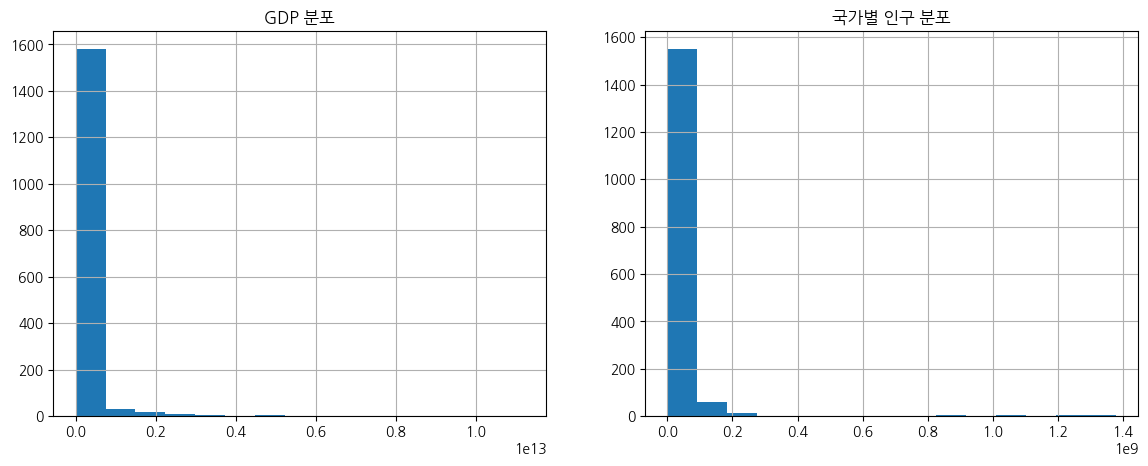

In [47]:
# 독립변수( population 과 GDP) 분포 확인 -> 히스토그램

fig, (ax1, ax2) = plt.subplots(nrows = 1,
                          ncols = 2,
                          figsize = (14,5))

Analytical_data['GDP'].hist(bins = 15, ax = ax1)
ax1.set_title('GDP 분포')

Analytical_data['Population'].hist(bins = 15, ax = ax2)
ax2.set_title('국가별 인구 분포')

In [48]:
# 한쪽으로 치우져있는 그래프 -> log변환 수행
# 이유 : 선형모델에 맞도록 정규화를 시켜야 정확한 예측 가능

In [49]:
import math

# log변환
Analytical_data['Log_GDP'] = np.log(Analytical_data['GDP'])
Analytical_data['Log_Population'] = np.log(Analytical_data['Population'])

Text(0.5, 1.0, '국가별 인구 분포(Log_Population)')

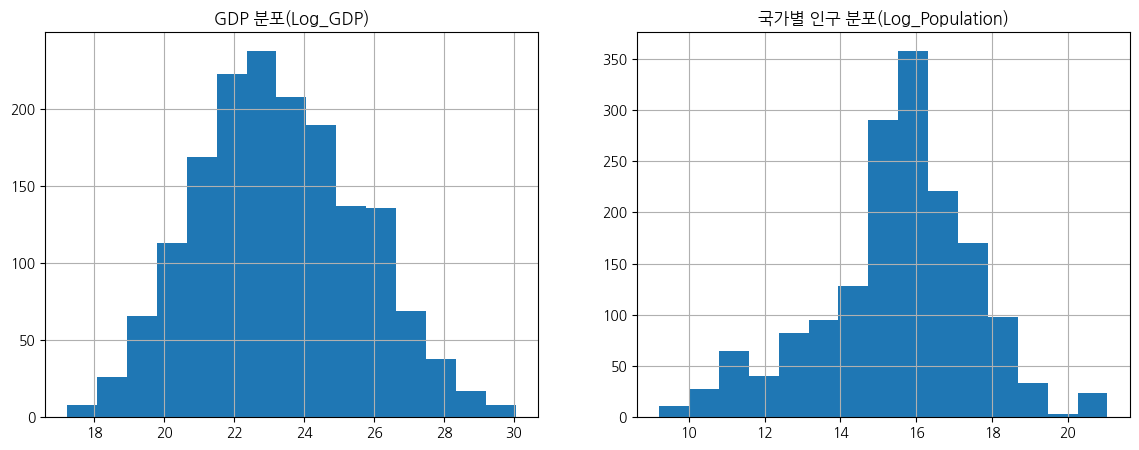

In [50]:
# 다시한번 그래프를 그려 이전에 그렸던 그래프와 비교
# 변환한 데이터가 정규분포에 조금이라도 같아졌는지 확인
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                          ncols = 2,
                          figsize = (14,5))

Analytical_data['Log_GDP'].hist(bins = 15, ax = ax1)
ax1.set_title('GDP 분포(Log_GDP)')

Analytical_data['Log_Population'].hist(bins = 15, ax = ax2)
ax2.set_title('국가별 인구 분포(Log_Population)')

In [51]:
# OLS분석 
y, X = dmatrices('Medal_Won_Corrected ~ Log_GDP + Log_Population + Total_Athletes + Home_adv', 
                data = Analytical_data,
                return_type = 'dataframe')

model = sm.OLS(y, X)
ols_results = model.fit()

ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Medal_Won_Corrected   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.779
Method:                  Least Squares   F-statistic:                     1454.
Date:                 Tue, 04 Mar 2025   Prob (F-statistic):               0.00
Time:                         14:30:23   Log-Likelihood:                -4665.4
No. Observations:                 1646   AIC:                             9341.
Df Residuals:                     1641   BIC:                             9368.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.2504      1.317      5.503      0.000       4.666       9.834
Log_GDP           -0.5263      0.075     -7.048      0.000      -0.673      -0.380
Log_Population     0.2100      0.070      3.010      0.003       0.073       0.347
Total_Athletes     0.1053      0.002     59.445      0.000       0.102       0.109
Home_adv         -10.5928      1.576     -6.721      0.000     -13.684      -7.501
==============================================================================
Omnibus:                     1267.641   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92147.468
Skew:                           2.990   Prob(JB):                         0.00
Kurtosis:                      39.164   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# 회귀 계수 가져오기
intercept = ols_results.params['Intercept']  # 절편
coeff_Log_GDP = ols_results.params['Log_GDP']
coeff_Log_Population = ols_results.params['Log_Population']
coeff_Total_Athletes = ols_results.params['Total_Athletes']
coeff_Home_adv = ols_results.params['Home_adv']

# 회귀식 출력
regression_equation = f"""
회귀식:
Y = {intercept:.2f} 
    + ({coeff_Log_GDP:.4f} * Log_GDP) 
    + ({coeff_Log_Population:.4f} * Log_Population) 
    + ({coeff_Total_Athletes:.4f} * Total_Athletes) 
    + ({coeff_Home_adv:.4f} * Home_adv)
"""

print(regression_equation)


회귀식:
Y = 7.25 
    + (-0.5263 * Log_GDP) 
    + (0.2100 * Log_Population) 
    + (0.1053 * Total_Athletes) 
    + (-10.5928 * Home_adv)



In [53]:
# 변수 값 (예시)
gdp = 1_720_000  # GDP (백만 달러)
population = 51_600_000  # 인구수
athletes = 143  # 참가 인원
host_country = 0  # 개최국 여부 (0: 비개최국)

# 로그 변환 적용
log_gdp = np.log(gdp)
log_population = np.log(population)

# 회귀식 계산 (올바른 로그 적용)
predicted_medals = (
    12.5302 +
    (-0.8136 * log_gdp) +
    (0.2566 * log_population) +
    (0.1225 * athletes) +
    (-12.3798 * host_country)
)

# 예측된 메달 갯수 출력
print(f'2024년 파리 올림픽 대한민국 메달 갯수 예측: {predicted_medals:.2f}개')

2024년 파리 올림픽 대한민국 메달 갯수 예측: 22.92개


In [54]:
print(Analytical_data['Medal_Won_Corrected'].mean())
print(Analytical_data['Medal_Won_Corrected'].var())

3.487849331713244
77.1034996879229


In [55]:
# 2.  Negative Binomial 회귀
# 분산이 평균보다 클 때(과대산포일때)사용
# mean:3.82 < var: 115.27

X = Analytical_data[['Log_GDP', 'Total_Athletes', 'Log_Population', 'Home_adv' ]]
X = sm.add_constant(X)  # 절편 추가
y = Analytical_data['Medal_Won_Corrected']

nb_model = sm.NegativeBinomial(y, X)
nb_results = nb_model.fit()
print(nb_results.summary())

         Current function value: 1.510138
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                      NegativeBinomial Regression Results                      
Dep. Variable:     Medal_Won_Corrected   No. Observations:                 1646
Model:                NegativeBinomial   Df Residuals:                     1641
Method:                            MLE   Df Model:                            4
Date:                 Tue, 04 Mar 2025   Pseudo R-squ.:                  0.1908
Time:                         14:30:23   Log-Likelihood:                -2485.7
converged:                       False   LL-Null:                       -3071.9
Covariance Type:             nonrobust   LLR p-value:                1.503e-252
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.2671      0.607    -11.971      0.000  

c:\Users\KDT17\anaconda3\envs\bigdata\Lib\site-packages\scipy\optimize\_optimize.py:1313: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\KDT17\anaconda3\envs\bigdata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
## 모델 적합도 확인 -> AIC값이 낮을수록 모델이 더 적합함

print("OLS AIC:", ols_results.aic)
print("Negative Binomial AIC:", nb_results.aic)

if ols_results.aic < nb_results.aic:
    print("OLS 모델이 더 적합합니다.")
else:
    print("Negative Binomial 모델이 더 적합합니다.")

OLS AIC: 9340.730315162129
Negative Binomial AIC: 4983.375818975135
Negative Binomial 모델이 더 적합합니다.


In [57]:
y_predicted = ols_results.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_predicted))

np.float64(10.045592026131775)

In [58]:
y_predicted = nb_results.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_predicted))

np.float64(116.19986274659372)

In [59]:
Analytical_data

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes,Country_Host,Home_adv,Log_GDP,Log_Population
0,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0,Japan,0,20.500122,16.090864
1,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0,Japan,0,21.791196,16.324782
2,1964,Argentina,1.0,2.560525e+10,21953929.0,102.0,Japan,0,23.966063,16.904457
3,1964,Australia,18.0,2.378766e+10,11167000.0,243.0,Japan,0,23.892433,16.228474
4,1964,Austria,0.0,9.169984e+09,7223801.0,56.0,Japan,0,22.939201,15.792892
...,...,...,...,...,...,...,...,...,...,...
2151,2016,Uzbekistan,13.0,6.722034e+10,31848200.0,70.0,Brazil,0,24.931242,17.276491
2152,2016,Vanuatu,0.0,7.735029e+08,270402.0,4.0,Brazil,0,20.466440,12.507665
2154,2016,Vietnam,2.0,2.052762e+11,92701100.0,22.0,Brazil,0,26.047622,18.344891
2158,2016,Zambia,0.0,2.106399e+10,16591390.0,7.0,Brazil,0,23.770831,16.624394


In [60]:
GDP_Veiw_Data = Analytical_data[['Year','Team','GDP','Medal_Won_Corrected','Country_Host']].sort_values('GDP', ascending=False)

In [61]:
GDP_Veiw_Data 

,Year,Team,GDP,Medal_Won_Corrected,Country_Host
1993,2016,China,1.119915e+13,70.0,Brazil
1789,2012,China,8.560547e+12,89.0,UK
1839,2012,Japan,6.203213e+12,38.0,UK
1635,2008,Japan,5.037908e+12,25.0,China
2043,2016,Japan,4.940159e+12,41.0,Brazil
...,...,...,...,...,...
101,1968,Belize,4.491018e+07,0.0,Mexico
1938,2012,Tuvalu,3.987575e+07,0.0,UK
1671,2008,Nauru,3.933357e+07,0.0,China
2144,2016,Tuvalu,3.421888e+07,0.0,Brazil


In [62]:
Hosting_Veiw_Data = GDP_Veiw_Data.sort_values('Year',ascending=False)

In [63]:
Hosting_Veiw_filter = Hosting_Veiw_Data[Hosting_Veiw_Data['Year'] > 2007]


In [64]:
Hosting_Veiw_filter

,Year,Team,GDP,Medal_Won_Corrected,Country_Host
1980,2016,Brazil,1.796187e+12,19.0,Brazil
2144,2016,Tuvalu,3.421888e+07,0.0,Brazil
2047,2016,Kiribati,1.815515e+08,0.0,Brazil
2042,2016,Jamaica,1.405691e+10,11.0,Brazil
2079,2016,Nauru,1.020601e+08,0.0,Brazil
...,...,...,...,...,...
1715,2008,Spain,1.635015e+12,18.0,China
1579,2008,Canada,1.549131e+12,19.0,China
1702,2008,Sao Tome and Principe,1.880212e+08,0.0,China
1635,2008,Japan,5.037908e+12,25.0,China


In [65]:
a = GDP_Veiw_Data[GDP_Veiw_Data['Team'] == GDP_Veiw_Data['Country_Host']]
a.sort_values('Year',ascending=False)

,Year,Team,GDP,Medal_Won_Corrected,Country_Host
1980,2016,Brazil,1.796187e+12,19.0,Brazil
1585,2008,China,4.598206e+12,100.0,China
1415,2004,Greece,2.405213e+11,16.0,Greece
1157,2000,Australia,4.154462e+11,58.0,Australia
923,1992,Spain,6.292024e+11,22.0,Spain
336,1976,Canada,2.065756e+11,11.0,Canada
155,1968,Mexico,2.936363e+10,9.0,Mexico
42,1964,Japan,8.174901e+10,29.0,Japan


# GDP 별 2016, 2012, 2008  총매달

In [66]:
# 2016, 2012 , 2008
# 매달 평균 , GDP 평균

GDP_Veiw_Data2016   =GDP_Veiw_Data[GDP_Veiw_Data['Year'] == 2016].sort_values('GDP', ascending=False)
GDP_Veiw_Data2012   =GDP_Veiw_Data[GDP_Veiw_Data['Year'] == 2012].sort_values('GDP', ascending=False)
GDP_Veiw_Data2008   =GDP_Veiw_Data[GDP_Veiw_Data['Year'] == 2008].sort_values('GDP', ascending=False)

In [67]:
GDP_Veiw_Data[['GDP','Medal_Won_Corrected']].corr()

,GDP,Medal_Won_Corrected
GDP,1.000000,0.662516
Medal_Won_Corrected,0.662516,1.000000


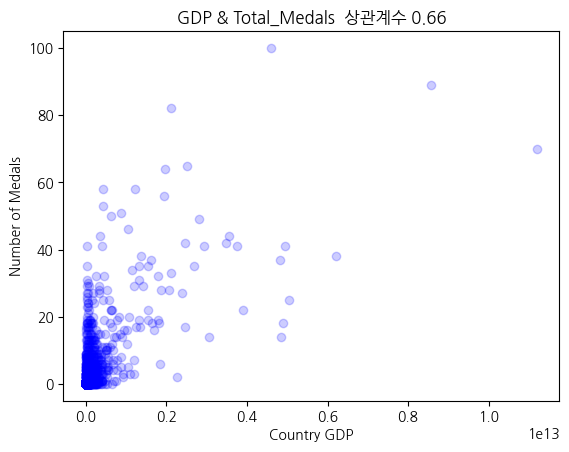

In [68]:
# 2016년 GDP 기준으로 매달 총량

# x 축 GDP
# Y 축 총 매달갯수
x = GDP_Veiw_Data['GDP']
y = GDP_Veiw_Data['Medal_Won_Corrected']
plt.scatter(x,y, alpha=0.2, color='b')


# X축과 Y축 범위 조정
# X축 범위 확대


a = GDP_Veiw_Data[['GDP','Medal_Won_Corrected']].corr()
plt.title(f'GDP & Total_Medals  상관계수 {a.iloc[0,1]:.2f}')

plt.xlabel('Country GDP')
plt.ylabel('Number of Medals')
plt.show()


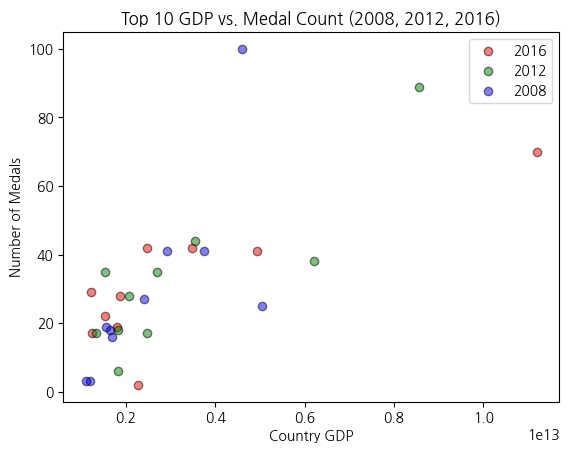

In [69]:
plt.scatter(GDP_Veiw_Data2016.head(10)['GDP'], GDP_Veiw_Data2016.head(10)['Medal_Won_Corrected'], 
            alpha=0.5, color='r', edgecolors='k', label="2016")
plt.scatter(GDP_Veiw_Data2012.head(10)['GDP'], GDP_Veiw_Data2012.head(10)['Medal_Won_Corrected'], 
            alpha=0.5, color='g', edgecolors='k', label="2012")
plt.scatter(GDP_Veiw_Data2008.head(10)['GDP'], GDP_Veiw_Data2008.head(10)['Medal_Won_Corrected'], 
            alpha=0.5, color='b', edgecolors='k', label="2008")

# X축과 Y축 라벨 추가
plt.xlabel("Country GDP")
plt.ylabel("Number of Medals")

# 그래프 제목 추가
plt.title("Top 10 GDP vs. Medal Count (2008, 2012, 2016)")

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()



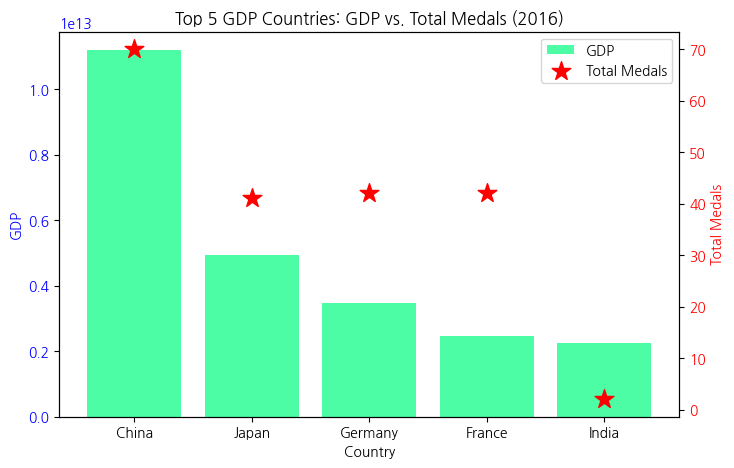

In [70]:
# GDP가 높은 국가 상위 5개 선택
top5_gdp = GDP_Veiw_Data2016.sort_values('GDP', ascending=False).head(5)

# X축 (국가 이름)
x = top5_gdp['Team']
# Y축 (GDP - Bar 그래프용)
y_gdp = top5_gdp['GDP']
# Y축 (총 메달 획득 수 - 산점도용)
y_medals = top5_gdp['Medal_Won_Corrected']



# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar 그래프 (GDP)
ax1.bar(x, y_gdp, color='#02fd80', alpha=0.7, label="GDP")
ax1.set_xlabel("Country")
ax1.set_ylabel("GDP", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 설정 (메달 개수)
ax2 = ax1.twinx()  # 새로운 Y축 추가
ax2.scatter(x, y_medals, color='red', marker='*', s=200, label="Total Medals")
ax2.set_ylabel("Total Medals", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목 및 범례 추가
plt.title("Top 5 GDP Countries: GDP vs. Total Medals (2016)")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc="upper right")
# 그래프 출력
plt.show()

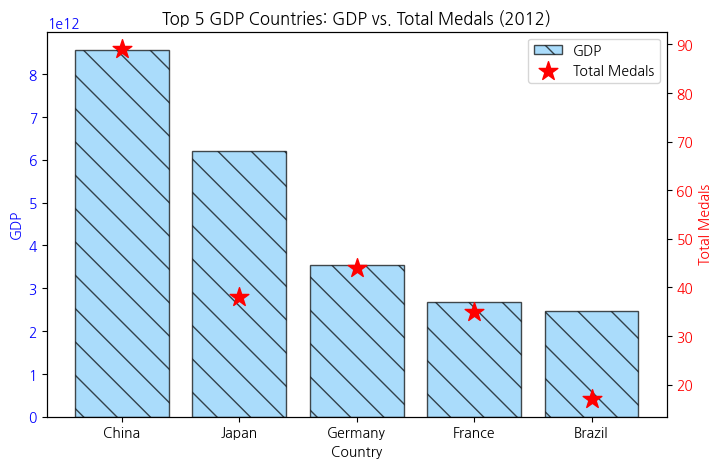

In [71]:
# GDP가 높은 국가 상위 5개 선택
top5_gdp = GDP_Veiw_Data2012.sort_values('GDP', ascending=False).head(5)

# X축 (국가 이름)
x = top5_gdp['Team']
# Y축 (GDP - Bar 그래프용)
y_gdp = top5_gdp['GDP']
# Y축 (총 메달 획득 수 - 산점도용)
y_medals = top5_gdp['Medal_Won_Corrected']



# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar 그래프 (GDP)
ax1.bar(x, y_gdp, color='lightskyblue',edgecolor='black', hatch='\\', alpha=0.7, label="GDP")
ax1.set_xlabel("Country")
ax1.set_ylabel("GDP", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 설정 (메달 개수)
ax2 = ax1.twinx()  # 새로운 Y축 추가
ax2.scatter(x, y_medals, color='red', marker='*', s=200, label="Total Medals")
ax2.set_ylabel("Total Medals", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목 및 범례 추가
plt.title("Top 5 GDP Countries: GDP vs. Total Medals (2012)")
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc="upper right")
# 그래프 출력
plt.show()

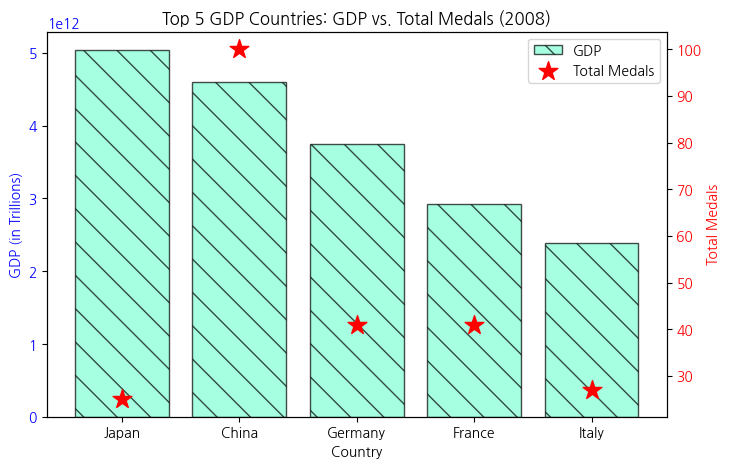

In [72]:

# GDP가 높은 국가 상위 5개 선택
top5_gdp = GDP_Veiw_Data2008.sort_values('GDP', ascending=False).head(5)

# X축 (국가 이름)
x = top5_gdp['Team']
# Y축 (GDP - Bar 그래프용)
y_gdp = top5_gdp['GDP']
# Y축 (총 메달 획득 수 - 산점도용)
y_medals = top5_gdp['Medal_Won_Corrected']

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar 그래프 (GDP)
ax1.bar(x, y_gdp, color='aquamarine', edgecolor='black', hatch='\\', alpha=0.7, label="GDP")
ax1.set_xlabel("Country")
ax1.set_ylabel("GDP (in Trillions)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 설정 (메달 개수)
ax2 = ax1.twinx()  # 새로운 Y축 추가
ax2.scatter(x, y_medals, color='red', marker='*', s=200, label="Total Medals")
ax2.set_ylabel("Total Medals", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목 추가
plt.title("Top 5 GDP Countries: GDP vs. Total Medals (2008)")

# ✅ 범례 정보 가져와서 합치기
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

# 그래프 출력
plt.show()